# Explicación del algoritmo

En este notebook aplicaremos el algoritmo k-means a una imagen para que tenga aspecto de un pixel art.

El algoritmo funciona de la siguiente forma:

En primer lugar, se eligen de forma aleatoria K pixeles (número de centros) de la imagen, que serán los centros iniciales.
En las siguientes iteraciones asignamos a cada pixel un centro, que será el más cercano. Para calcular los nuevos centros hacemos la media de los pixeles asignados a cada centro.

# Código del algoritmo k-means

### Librerias importadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Algoritmo k-means

In [2]:
def encuentra_centro_mas_cercano(X, centros):
    """
    Calcula el centro más cercano de cada pixel de X
  
    Parámetros:
    - X (numpy.ndarray): (m,n) Conjunto de datos
    - centros (numpy.ndarray): K centros
    
    Devuelve:
    - idx (numpy.ndarray): (m,) Array que contiene el índice del centro que le corresponde a cada pixel
    """
  
    K = centros.shape[0]
    
    #Lista que contendrá el indice del centro más cercano a cada pixel
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        
        #Calculamos la distancia a la que está el pixel a los centros y 
        #asignamos al pixel i el indice del centro más cercano
        distancias = [np.linalg.norm(X[i] - centros[j]) for j in range(K)]
        idx[i] = np.argmin(distancias)

    return idx

def calcula_centros(X, idx, K):
    """
    Calcula los nuevos centros con la media de los pixeles que han sido asignados a dichos centros

    Parámetros:
    - X (numpy.ndarray): (m,n) Conjunto de datos
    - idx (numpy.ndarray): (m,) Array que contiene el índice del centro que le corresponde a cada pixel
    - K (int): Número de centros

    Devuelve:
    - centros (numpy.ndarray): (K,n) Nuevos centros calculados
    """

    m,n = X.shape
    centros = np.zeros((K,n))    #Array que contendrá los centros

    for i in range(K):
        
        # Pixeles que pertenecen al centro de la posición i
        puntos = X[idx==i]
        if(np.size(puntos) != 0):
            # Calculamos el nuevo centro, que será la media de los pixeles asignados a dicho centro
            centros[i] = np.mean(puntos, axis=0)

    return centros

def calcula_centros_iniciales(X, K):
    """
    Calcula de forma aleatoria los centros iniciales

    Parámetros:
    - X (numpy.ndarray): (m,n) Conjunto de datos
    - K (int): Número de centros

    Devuelve:
    - centros (numpy.ndarray): (K,n) Centros iniciales
    """

    # Barajamos los índices de forma aleatoria
    randid = np.random.permutation(X.shape[0])

    #Tomamos los K primeros pixeles como centros
    centros = X[randid[:K]]

    return centros

def run_kMeans(X, K, max_iters=10):
    """
    Corre el algoritmo de k-Means

    Parámetros:
    - X (numpy.ndarray): (m,n) Conjunto de datos
    - K (int): Número de centros
    - max_iters (int): Número máximo de iteraciones del algoritmo

    Devuelve:
    - centros (numpy.ndarray): (K,n) Centros finales
    - idx (numpy.ndarray): (m,) Array que contiene el índice del centro que le corresponde a cada pixel
    """

    centros = calcula_centros_iniciales(X, K)
    centros_anteriores = centros

    for i in range(max_iters):
        print(f"Iteración de k-means: {i+1}/{max_iters}")
    
        #Obtenemos la lista con el indice del centro al que se le asigna a cada pixel
        idx = encuentra_centro_mas_cercano(X, centros)

        #Calculamos los nuevos centros
        centros = calcula_centros(X, idx, K)

        if((centros == centros_anteriores).all()):
            print("No son necesarias más iteraciones.")
            break
        else:
            centros_anteriores = centros

    return centros, idx

# Visualización de imagen

### Visualización imagen original

Forma de la imagen original: (300, 300, 3)


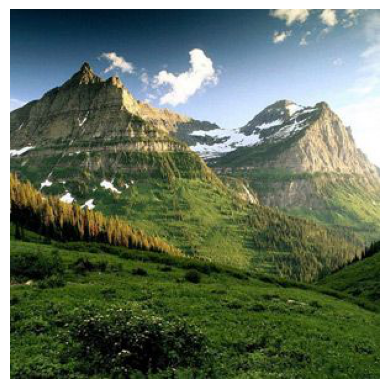

In [3]:
# Escribir la ruta de la imagen 
# (RECOMENDACIÓN: elegir una imagen (NO PNG) con dimensiones pequeñas, como 300x300, sino el algoritmo tarda demasiado)
ruta_imagen = "image.jpg"

original_img = plt.imread(ruta_imagen)
plt.imshow(original_img)
plt.axis('off')

print(f"Forma de la imagen original: {original_img.shape}")

flatten_img = np.reshape(original_img, (original_img.shape[0]*original_img.shape[1], 3))

### Cálculo de la nueva imagen

In [4]:
# Número de colores que tendrá la imagen
K = 16

max_iters = 10
X_img = flatten_img/255

# Centros finales e índice del centro que le pertenece a cada pixel
centros, idx = run_kMeans (X_img, K, max_iters)

# Matriz en formato original con los valores de los pixeles en función del centro asignado
X_recovered = np.reshape(centros[idx, :], original_img.shape)

# Compruebo si los centros son menores que 0.1 debido a los diferentes formatos de imagenes
# En formatos como png, los pixeles tienen valores muy pequeños y con decimales
if(np.all(centros<=0.1)):
    pixelArt_img = X_recovered*255

# En formatos como webp, los pixeles no tienen decimales, de forma que hay que convertirlo a INT 
# (puesto que los centros asignados si pueden tener decimales)
else:
    pixelArt_img = np.round(X_recovered*255).astype(int)

Iteración de k-means: 1/10
Iteración de k-means: 2/10
Iteración de k-means: 3/10
Iteración de k-means: 4/10
Iteración de k-means: 5/10
Iteración de k-means: 6/10
Iteración de k-means: 7/10
Iteración de k-means: 8/10
Iteración de k-means: 9/10
Iteración de k-means: 10/10


### Comparación de imagenes: Original - Pixel Art

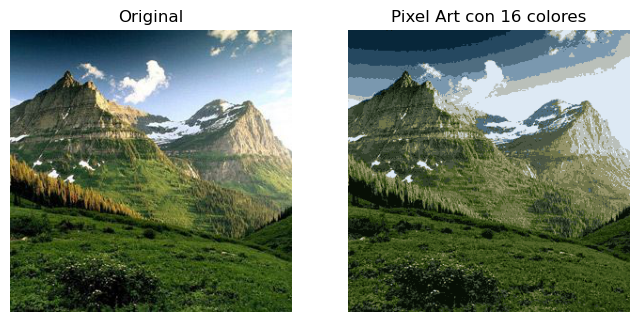

In [5]:
fig,ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(pixelArt_img)
ax[1].set_title(f'Pixel Art con {K} colores')
ax[1].set_axis_off()

### Visualización imagen Pixel Art

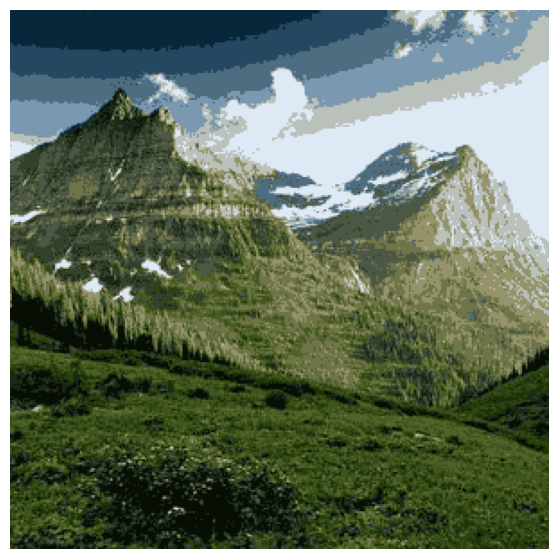

In [6]:
plt.figure(figsize=(7,7))
plt.imshow(pixelArt_img)
plt.axis('off')
plt.show()

# Algoritmo con Sklearn

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters = 16, n_init="auto", max_iter=10)

# Indice del centro que le corresponde a cada pixel
idx = kmeans.fit_predict(flatten_img)
centros = kmeans.cluster_centers_.astype(int)

In [9]:
X_recovered = np.reshape(centros[idx, :], original_img.shape)

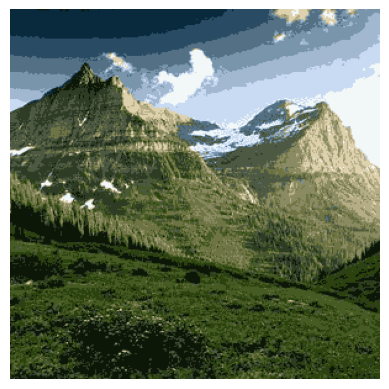

In [10]:
plt.imshow(X_recovered)
plt.axis('off')
plt.show()